## Извлечение данных

In [ ]:
import zipfile
import json
import pandas as pd
from tqdm import tqdm

In [ ]:
df=pd.DataFrame(columns=['text','category','id_category'])
with zipfile.ZipFile('/content/drive/MyDrive/ML/WS_2021/src_files.zip') as z:
  for filename in tqdm(z.namelist()):
    with z.open(filename) as f:
      text=f.read()
      s=text.decode('utf-8')
      js=json.loads(s)
      for feed in js['feed']:
        try:
          title=feed['meta']['title']
          if title=='Сообщение пользователя':
            msg=''
            for t in feed['payload']['body']:
              msg+=t['text']+' '
        except:
          continue
      ctg=js['reason']['category']['name']
      id_ctg=js['reason']['category']['id']
      df.loc[len(df)]=[msg.replace('X',''),ctg,id_ctg]

 11%|█         | 6635/59889 [00:23<03:07, 284.10it/s]


KeyboardInterrupt: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59889 entries, 0 to 59888
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         59889 non-null  object
 1   category     59889 non-null  object
 2   id_category  59889 non-null  object
dtypes: object(3)
memory usage: 1.8+ MB


In [ ]:
df.head()

,text,category
0,"1й подъезд, 5 этаж. В коридоре над висит ка...",Содержание МКД
1,Маленькмй лифт изрисован внутри.,Содержание МКД
2,реклама на светофоре,Благоустройство
3,"1й подъезд, 5 этаж, квартирный холл. Рааботник...",Содержание МКД
4,незаконная решетка на фасаде,Нарушение правил пользования общим имуществом


In [ ]:
df.to_csv('/content/drive/MyDrive/ML/WS_2021/data.csv',index=False)

In [ ]:
js

{'id': 2956870,
 'district_name': 'Адмиралтейский',
 'watchers_count': 0,
 'feed': [{'widget': 'public.status',
   'key': 'changestatus_12290979',
   'payload': {'id': 12290979,
    'dt': '2020-11-16T01:30:40.716722',
    'status_name': 'Завершено: Автоматически',
    'status': 4},
   'meta': {'title': 'Изменение статуса сообщения',
    'bg_color': '#EEEEEE',
    'icon': 'fa-thumbs-up fa-flip-horizontal',
    'icon_bg_color': '#65C381'},
   'content_type': 30},
  {'widget': 'public.status',
   'key': 'changestatus_12083881',
   'payload': {'id': 12083881,
    'dt': '2020-10-26T10:29:46.135967',
    'status_name': 'Получен ответ',
    'status': 4},
   'meta': {'title': 'Изменение статуса сообщения',
    'bg_color': '#EEEEEE',
    'icon': 'fa-comments-o',
    'icon_bg_color': '#AC89C7'},
   'content_type': 30},
  {'widget': 'public.answer',
   'key': 'answer_7327168',
   'payload': {'id': 7327168,
    'dt': '2020-10-24T19:26:11.137200',
    'status_name': 'Принят',
    'body': 'Уважаемый

In [ ]:
#ответ на обращение (их несколько)
js['feed'][2]['payload']['body_html']

'<p>Уважаемый пользователь!</p><p>Рассмотрев Ваше сообщение № 2947973 по вопросу размещения инженерного и технического оборудования на фасаде многоквартирного дома, сообщаем следующее.</p><p>Информация, указанная в Вашем сообщении, подтвердилась.</p><p>В связи с тем, что факт наличия на фасаде не согласованного инженерного и технического оборудования является нарушением Правил благоустройства территории Санкт-Петербурга, утвержденных постановлением Правительства Санкт-Петербурга от 09.11.2016 №961 (далее - Правила), администрацией района была проведена процедура, предусмотренная ч.1 ст.16 Закона Санкт-Петербурга от 31.05.2018 № 273-70 (далее - Закон), в порядке, предусмотренном ч.3 ст.28.1 КоАП РФ.</p><p>В связи с отсутствием у администрации информации о лице, которым допущены нарушения Правил, а именно паспортные данные, необходимые для составления протокола об административном правонарушении по ст.16 ч.1 Закона, протокол не был составлен, срок привлечения к административной ответстве

In [ ]:
js['feed'][9]['meta']['title']

'Сообщение пользователя'

In [ ]:
js['feed'][5]['payload']['body']

[{'text': '1й подъезд, 5 этаж. В коридоре над ', 'typeof': 1},
 {'typeof': 2, 'text': 'XXXX'},
 {'text': ' висит какой-то провод. Возможно, под напряжением.\nПредседатель тсж "Ленинградские Вечера" отказывается принимать заявку на устранение более полугода.  ',
  'typeof': 1},
 {'typeof': 2,
  'text': 'XXX XXXX XXXXXXXX XX XXXXXXXXXX XXXXXX XXXXXXXXX XXXX XXXXXXXX X XXX XXXXXXX XX XXXXXXX XXXXXX XXXXXX XXXXXXXXX XXXX XXXXXXXX X XXX XXXXXXX X XX XXXXXXXXXX XXXXXXXXXXXX X XXX XXXXXXXXX X X XXX XXXXXXX'}]

In [ ]:
js['reason']['category']['name']

'Нарушение правил пользования общим имуществом'

## Предобработка

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ML/WS_2021/data.csv')
df.head()

,text,category,id_category
0,"1й подъезд, 5 этаж. В коридоре над висит ка...",Содержание МКД,10
1,Маленькмй лифт изрисован внутри.,Содержание МКД,10
2,реклама на светофоре,Благоустройство,3
3,"1й подъезд, 5 этаж, квартирный холл. Рааботник...",Содержание МКД,10
4,незаконная решетка на фасаде,Нарушение правил пользования общим имуществом,23


In [ ]:
!pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.3 MB/s 
     |████████████████████████████████| 8.2 MB 8.9 MB/s 
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=8bfae189b07f9eecec0302109e2d00dab96f7c9e9ad2fbcae6d4a92140c36a9a
  Stored in directory: /root/.cache/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
Successfully built docopt


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pymorphy2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df.head()

,text,category,id_category
0,"1й подъезд, 5 этаж. В коридоре над висит ка...",Содержание МКД,10
1,Маленькмй лифт изрисован внутри.,Содержание МКД,10
2,реклама на светофоре,Благоустройство,3
3,"1й подъезд, 5 этаж, квартирный холл. Рааботник...",Содержание МКД,10
4,незаконная решетка на фасаде,Нарушение правил пользования общим имуществом,23


In [ ]:
text=df['text']
norm_text=[]
morph=pymorphy2.MorphAnalyzer()
for s in tqdm(text):
    s1 = re.sub(r'[^\w\s]+|[\d]+', r'',s).strip()
    s1 = s1.lower()
    s1 = word_tokenize(s1)
    words=[]
    for i in s1:
        pv = morph.parse(i)
        words.append(pv[0].normal_form)
    sentence=' '.join(words)
    norm_text.append(sentence)

100%|██████████| 59889/59889 [03:42<00:00, 268.82it/s]


In [ ]:
norm_text[:1]

['й подъезд этаж в коридор над висеть какойтый провод возможно под напряжение председатель тсж ленинградский вечер отказываться принимать заявка на устранение более полгода']

In [ ]:
df['text'][:1].values[0]

'1й подъезд, 5 этаж. В коридоре над    висит какой-то провод. Возможно, под напряжением.\nПредседатель тсж "Ленинградские Вечера" отказывается принимать заявку на устранение более полугода.                                    '

In [ ]:
russian_stopwords = stopwords.words("russian")
vectorizer = CountVectorizer(max_features=500, min_df=20, max_df=0.7, stop_words=russian_stopwords)
text_cv = vectorizer.fit_transform(norm_text)
text_cv = pd.DataFrame(text_cv.toarray(),columns=vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
russian_stopwords = stopwords.words("russian")
vectorizer_tfidf = TfidfVectorizer(max_features=500, min_df=20, max_df=0.7, stop_words=russian_stopwords)
text_tfidf = vectorizer_tfidf.fit_transform(norm_text)
text_tfidf = pd.DataFrame(text_tfidf.toarray(),columns=vectorizer_tfidf.get_feature_names())
text_tfidf.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,httpgorodgovspbruproblems,аварийный,автомобиль,административный,администрация,адрес,арка,асфальт,асфальтовый,бак,...,щит,щиток,элемент,этаж,это,являться,ям,яма,январь,ящик
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.202361,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.138368,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


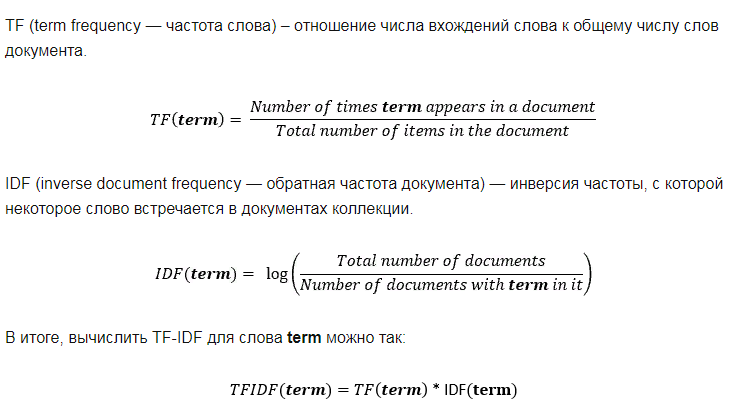

In [ ]:
text_tfidf['id_category']=df['id_category']
text_tfidf['category']=df['category']
text_tfidf.to_csv('/content/drive/MyDrive/ML/WS_2021/vectors.csv',index=False)

## Понижение размерности/графики/кластеризация:

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.express as px
from sklearn.cluster import KMeans
import numpy as np

In [2]:
text_tfidf=pd.read_csv('/content/drive/MyDrive/ML/WS_2021/vectors.csv')

In [3]:
pca=PCA(n_components=2) #или tsne, umap
reduced_pca = pca.fit_transform(text_tfidf.drop(['category','id_category'],axis=1))

In [4]:
pca_df=pd.DataFrame(reduced_pca)
pca_df.columns=['x1','x2']
pca_df['category']=text_tfidf['category']

In [5]:
pca_df.head()

,x1,x2,category
0,-0.057988,-0.039907,Содержание МКД
1,-0.050131,-0.025217,Содержание МКД
2,-0.067708,-0.032575,Благоустройство
3,-0.054815,0.005352,Содержание МКД
4,-0.104710,-0.022139,Нарушение правил пользования общим имуществом


In [ ]:
fig = px.scatter(pca_df, x="x1", y="x2", color="category")
fig.update_traces(marker_size=10)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [6]:
model = KMeans(n_clusters=15)
model.fit(text_tfidf.drop(['category','id_category'],axis=1))
predicted_label = model.predict(text_tfidf.drop(['category','id_category'],axis=1))

In [7]:
predicted_label[:10]

array([ 0,  0, 13,  1, 11,  0,  0,  1,  9,  8], dtype=int32)

In [18]:
for_pivot=text_tfidf.drop(['category','id_category'],axis=1)
for_pivot['cluster']=predicted_label
for_pivot=for_pivot.groupby(['cluster']).sum()
for_pivot=for_pivot.T

In [19]:
for_pivot

cluster,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
httpgorodgovspbruproblems,49.038909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
аварийный,114.994023,13.891376,0.000000,0.000000,1.128189,0.209558,0.296869,2.679913,0.177833,1.365649,5.397874,0.0,0.000000,0.000000,1.028125
автомобиль,120.618028,2.133902,0.000000,0.000000,0.806334,0.000000,0.000000,0.000000,5.946787,25.193516,9.256767,0.0,0.000000,0.000000,1.391089
административный,49.375884,0.000000,0.000000,0.000000,0.241453,0.000000,3.239589,0.000000,0.000000,0.000000,0.471794,0.0,0.000000,0.000000,0.237779
администрация,51.519323,4.430428,0.000000,0.000000,3.870170,0.000000,1.535796,0.633615,0.000000,0.000000,0.517943,0.0,0.000000,0.749809,1.778422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
являться,34.029346,5.702180,0.000000,0.234335,0.496392,0.235249,2.051435,0.852627,0.947794,0.403996,1.756581,0.0,0.732362,0.784415,1.460086
ям,378.743587,2.569380,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,87.075127,0.000000,14.149420,0.0,0.000000,0.000000,0.000000
яма,280.630065,3.771487,0.000000,0.000000,1.092148,0.000000,0.000000,0.000000,0.000000,0.692725,18.281074,0.0,0.000000,0.000000,0.000000
январь,23.330357,7.773093,0.282032,0.700860,0.915849,0.000000,0.000000,0.328012,0.000000,0.686652,1.855002,0.0,0.000000,0.000000,25.224665


In [13]:
for_pivot.sort_values(by=for_pivot.columns[5],ascending=False).head(10)

cluster,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
объявление,55.439260,24.945954,20.366119,0.519581,0.173757,1012.061232,24.883362,150.274630,0.000000,0.000000,52.342982,0.000000,16.413626,3.849240,1.692326
знак,303.716413,4.284096,95.321748,13.325522,0.000000,215.005604,2.215864,0.000000,1.038935,1.271023,31.255911,0.000000,32.979907,156.890721,0.468391
несанкционированный,65.501719,33.148609,349.311053,0.000000,1.615528,101.428492,21.190176,92.188052,0.338919,2.272513,79.065734,1.841659,7.582715,34.055614,0.318190
дорожный,333.607017,0.000000,51.332587,13.259227,1.902195,71.697362,4.559858,2.072040,0.979395,4.398102,60.552261,0.000000,18.709646,93.683694,0.000000
опор,12.460079,0.000000,15.709290,0.000000,0.325693,64.778586,2.741450,270.747469,0.000000,0.000000,0.484798,0.000000,4.216276,30.681337,0.000000
очистить,94.161341,15.536414,42.095856,1081.403804,13.676252,49.861189,6.962826,7.080572,9.484949,13.037708,14.390032,0.000000,25.844605,96.404331,0.933283
надпись,69.620946,72.592871,2005.706824,16.276613,0.000000,42.942589,16.474420,8.280232,0.000000,0.000000,19.134977,0.243422,5.830679,21.524578,0.772816
рекламный,20.948547,10.333582,4.694096,0.000000,0.380185,42.222504,535.549591,5.698436,0.000000,1.467193,60.122752,0.362367,3.513493,2.903145,0.449274
необходимо,322.844208,114.659124,49.848653,44.280553,60.133367,38.310575,47.703745,26.310714,7.427998,42.126603,20.434358,1.616724,11.087468,14.962867,20.262038
щит,40.907500,18.620129,9.507514,0.000000,0.000000,33.746267,47.808540,0.000000,0.000000,1.440462,0.000000,0.000000,4.852948,8.286564,1.791491


In [ ]:
#классификация - обучить модель мультиклассовая 
-логистическая регрессия
-деревья решений
-случайный лес
-градиентный бустинг
+метрики оценки качества классификацию